In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ad_spend.csv')
print(df.head)
print()
print(df.shape)

<bound method NDFrame.head of      Ad Spend ($)   Season  Revenue ($)
0             463  Monsoon          440
1             158   Winter          297
2             328  Monsoon          214
3             322  Monsoon           48
4             726   Winter         1048
..            ...      ...          ...
195           407   Summer          609
196           182  Monsoon          183
197           184  Monsoon           10
198           380   Summer          504
199           981   Winter         1266

[200 rows x 3 columns]>

(200, 3)


In [5]:
gplot = df.groupby('Season')[['Revenue ($)', 'Ad Spend ($)']].mean()
gplot

,Revenue ($),Ad Spend ($)
Season,,
Monsoon,423.150685,517.643836
Summer,689.360656,573.836066
Winter,826.530303,552.560606


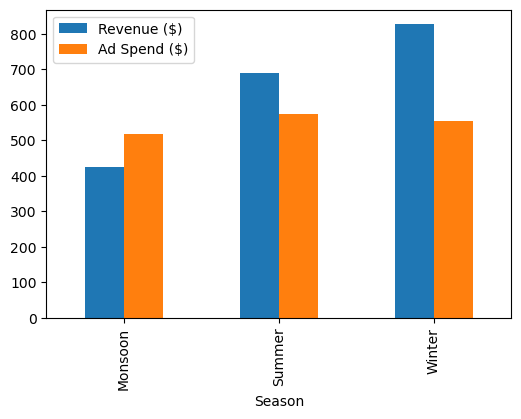

In [6]:
bplot = gplot.plot(kind='bar',figsize=(6,4))

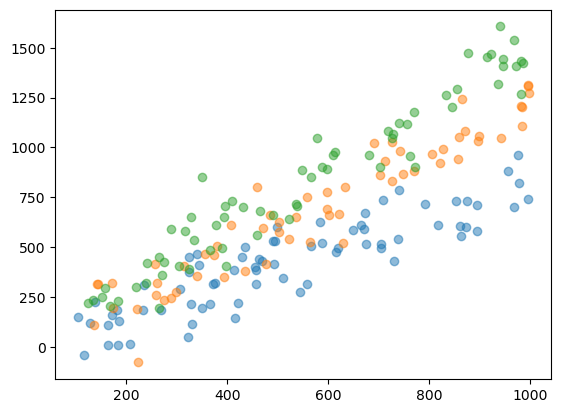

In [8]:
for season,subdf in df.groupby('Season'):
    plt.scatter(subdf['Ad Spend ($)'], subdf['Revenue ($)'], label='season',alpha=0.5)

plt.show()

In [9]:
df_encoded = pd.get_dummies(df,columns=['Season'],drop_first=True)
df_encoded

,Ad Spend ($),Revenue ($),Season_Summer,Season_Winter
0,463,440,False,False
1,158,297,False,True
2,328,214,False,False
3,322,48,False,False
4,726,1048,False,True
...,...,...,...,...
195,407,609,True,False
196,182,183,False,False
197,184,10,False,False
198,380,504,True,False


In [24]:
from sklearn.model_selection import train_test_split

X = df_encoded[['Ad Spend ($)','Season_Summer','Season_Winter']]
y = df_encoded['Revenue ($)']

X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [25]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.888209700047729

In [26]:
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor()
model1.fit(X_train,y_train)
model1.score(X_test,y_test)

0.8972778553142061

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

model2 = GradientBoostingRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.888209700047729

In [30]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mean_squared_error(y_test,y_pred)

18509.22281017346

In [31]:
df_eval = pd.DataFrame({'Actual':y_test, 'Predicted': y_pred})
df_eval.head()

,Actual,Predicted
59,605,834.516520
5,1125,1043.290721
20,699,683.827654
198,504,445.345823
52,1310,1161.945335


In [33]:
df_eval['Diff %'] = abs((df_eval['Predicted'] - df_eval['Actual'])*100/df_eval['Actual'])
df_eval.head()

,Actual,Predicted,Diff %
59,605,834.516520,37.936615
5,1125,1043.290721,7.263047
20,699,683.827654,2.170579
198,504,445.345823,11.637734
52,1310,1161.945335,11.301883


In [34]:
df_eval['Diff %'].quantile(0.75)

np.float64(33.36386283363761)